# ***Importing Libraries and Working with Data***

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import models, layers, losses, Input
import numpy as np

In [2]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [3]:
print(f"Shape of train image: {train_image.shape} \nShape of test image: {test_image.shape}")

Shape of train image: (60000, 28, 28) 
Shape of test image: (10000, 28, 28)


In [4]:
train_image = np.reshape(train_image, (-1, 784))
test_image = np.reshape(test_image, (-1, 784))

In [5]:
train_image = train_image.astype('float32') / 255
test_image = test_image.astype('float32') / 255

# ***Creating Autoencoder Model***

In [6]:
input_dim = 28 * 28
latent_vec_dim = 16

In [7]:
input_layer = Input(shape = (input_dim, ))

# Building Encoder
enc_layer_1 = layers.Dense(500, activation = 'sigmoid')(input_layer)
enc_layer_2 = layers.Dense(300, activation = 'sigmoid')(enc_layer_1)
enc_layer_3 = layers.Dense(100, activation = 'sigmoid')(enc_layer_2)
enc_layer_4 = layers.Dense(latent_vec_dim, activation = 'tanh')(enc_layer_3)

encoder = enc_layer_4

# Building Decoder
dec_layer_1 = layers.Dense(100, activation = 'sigmoid')(encoder)
dec_layer_2 = layers.Dense(300, activation = 'sigmoid')(dec_layer_1)
dec_layer_3 = layers.Dense(500, activation = 'sigmoid')(dec_layer_2)
dec_layer_4 = layers.Dense(input_dim, activation = 'sigmoid')(dec_layer_3)

decoder = dec_layer_4

auto_encoder = models.Model(input_layer, decoder, name = "Autoencoder")

#latent_model = models.Model(input_layer, encoder)

auto_encoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               

In [8]:
auto_encoder.compile(
    optimizer = 'adam',
    loss = losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [10]:
model_history = auto_encoder.fit(train_image, train_image, batch_size = 128,
                                 epochs = 100, shuffle = True, validation_data = (test_image, test_image))

Epoch 1/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1174 - accuracy: 0.0129 - val_loss: 0.1203 - val_accuracy: 0.0122
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1171 - accuracy: 0.0130 - val_loss: 0.1198 - val_accuracy: 0.0146
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1168 - accuracy: 0.0128 - val_loss: 0.1199 - val_accuracy: 0.0121
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1165 - accuracy: 0.0137 - val_loss: 0.1196 - val_accuracy: 0.0131
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.0137 - val_loss: 0.1195 - val_accuracy: 0.0152
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.0133 - val_loss: 0.1191 - val_accuracy: 0.0117
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1156 - accuracy: 0.0142 - val_loss: 0.1191 - val_accuracy: 0.0143

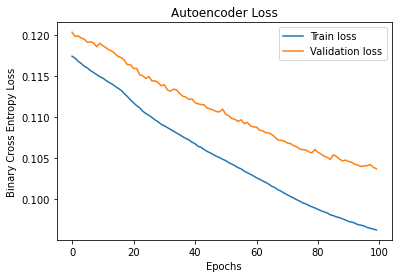

In [12]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'Train loss')
plt.plot(model_history.history['val_loss'], label = 'Validation loss')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epochs')
plt.title('Autoencoder Loss')
plt.legend(loc = 'upper right')
plt.show()

# ***Testing Model***

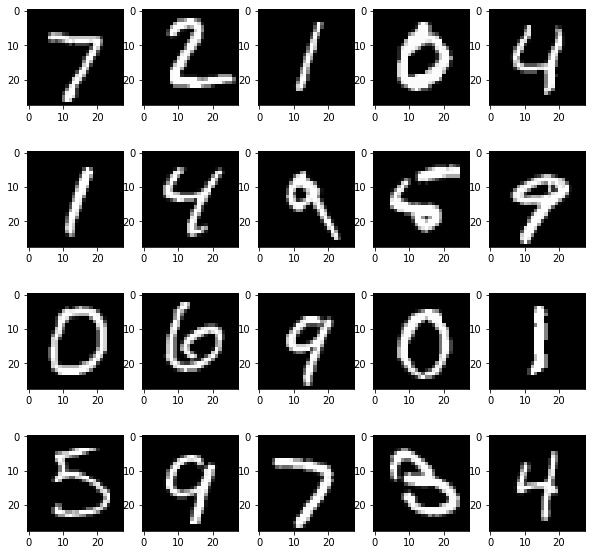

In [20]:
plt.figure(figsize = (10, 10))
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(test_image[i].reshape(28, 28), cmap = 'gray')
plt.show()

313/313 [==============================] - 1s 2ms/step


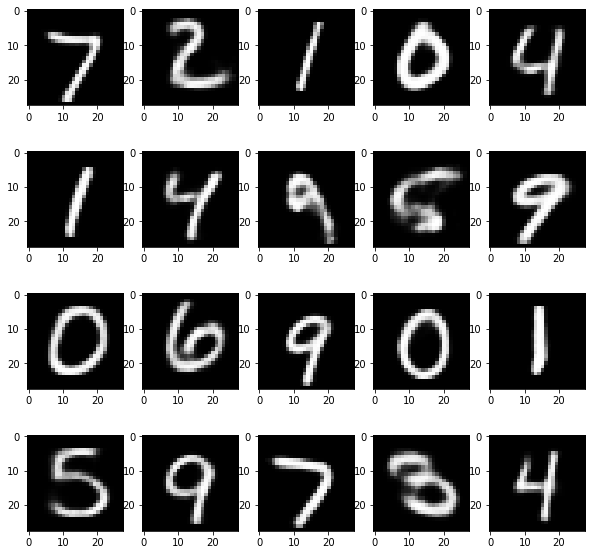

In [22]:
compressed_image = auto_encoder.predict(test_image)

plt.figure(figsize = (10, 10))
for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(compressed_image[i].reshape(28, 28), cmap = 'gray')
plt.show()